In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qdatoolkit as qda

file_path = "data/pca_rowwise.csv"
df = pd.read_csv(file_path)

df.head()

,T2,layer_id
0,18.8477,0
1,10.9791,0
2,15.2679,0
3,12.9197,0
4,15.4056,0


Runs test statistic = -45.985
Runs test p-value = 0.000



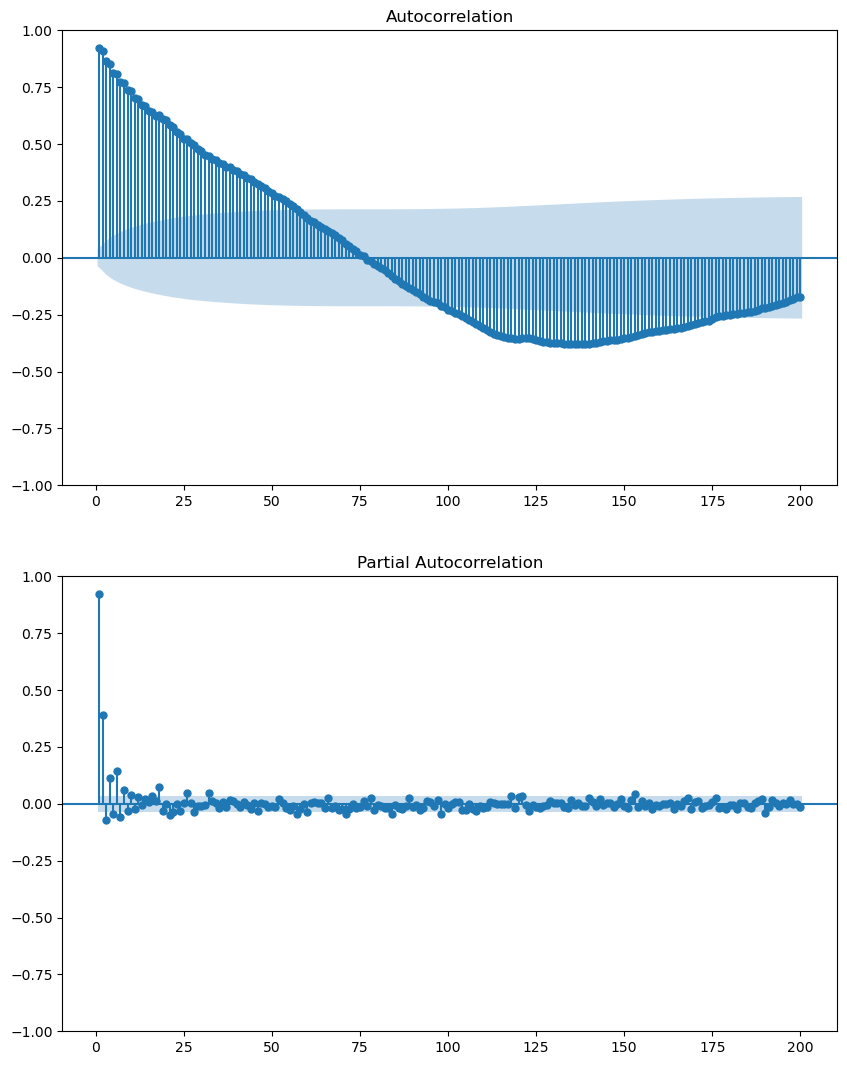

In [10]:
_ = qda.Assumptions(df['T2']).independence()

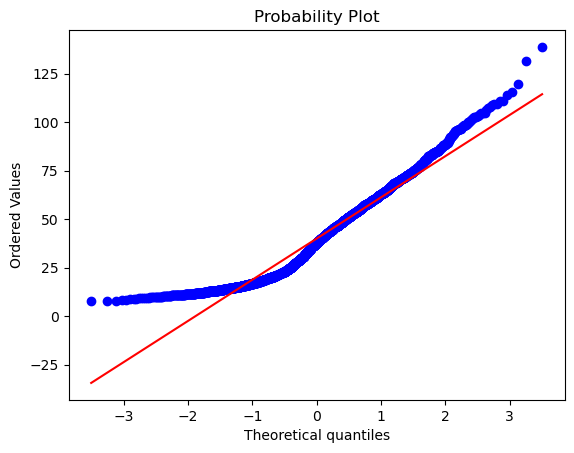

Shapiro-wilk test statistic = 0.943
Shapiro-wilk test p-value = 0.000


In [ ]:
_ = qda.Assumptions(df['T2']).normality()

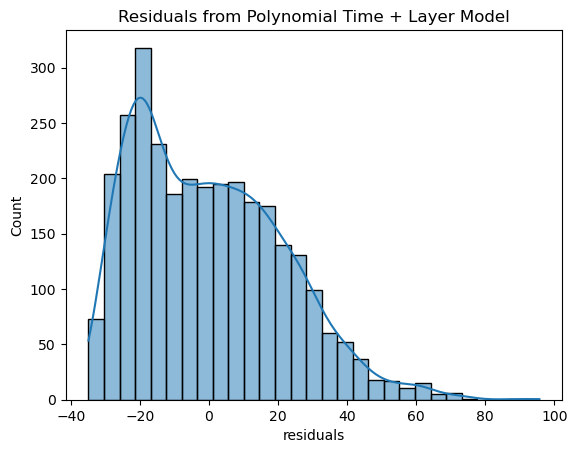

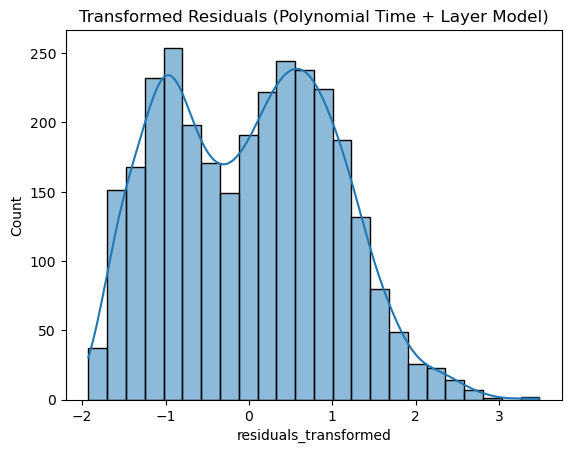

Shapiro-Wilk Test after transformation: p-value = 1.430330912692785e-22


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import statsmodels.api as sm


# Step 1: Add time (index) and quadratic time term
df['t'] = df.index  # Time as the index (row number)
df['t_squared'] = df['t'] ** 2  # Quadratic term for time

# Step 2: Fit the regression model with t, t^2, and layer_id
X = sm.add_constant(df[['t', 't_squared', 'layer_id']])  # Add constant term for intercept
model = sm.OLS(df['T2'], X).fit()  # Fit the model
df['residuals'] = model.resid  # Get residuals

# Step 3: Check residuals (distribution)
sns.histplot(df['residuals'], kde=True)
plt.title('Residuals from Polynomial Time + Layer Model')
plt.show()

# Step 4: Transform residuals (Yeo-Johnson for normality)
pt = PowerTransformer(method='yeo-johnson')
df['residuals_transformed'] = pt.fit_transform(df[['residuals']])

# Step 5: Check transformed residuals
sns.histplot(df['residuals_transformed'], kde=True)
plt.title('Transformed Residuals (Polynomial Time + Layer Model)')
plt.show()

# Step 6: Shapiro-Wilk Test for normality
stat, p = stats.shapiro(df['residuals_transformed'])
print("Shapiro-Wilk Test after transformation: p-value =", p)


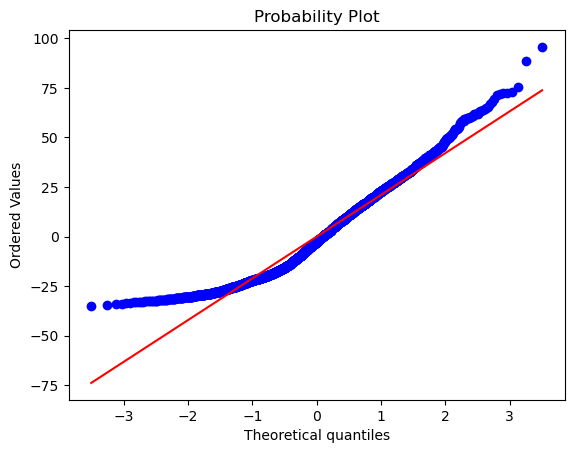

Shapiro-wilk test statistic = 0.956
Shapiro-wilk test p-value = 0.000


In [30]:
_=qda.Assumptions(df['residuals']).normality()

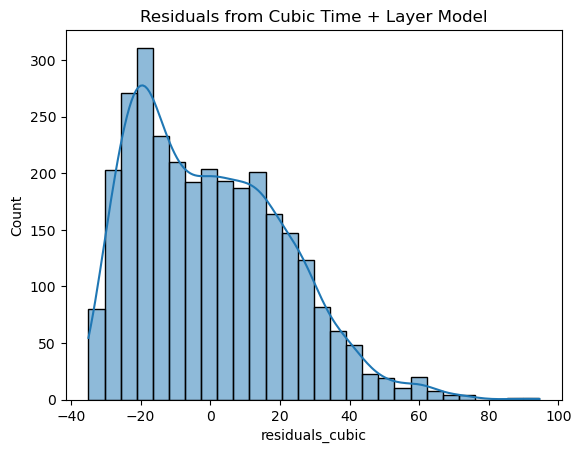

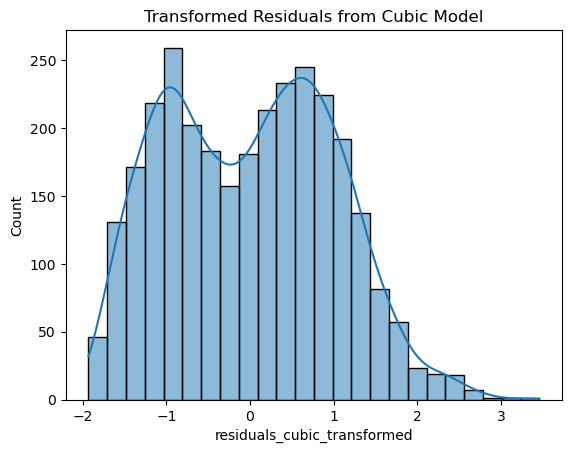

Shapiro-Wilk Test for cubic model: p-value = 4.464861846774645e-22


In [41]:
# Step 1: Add cubic time term (t^3)
df['t_cubed'] = df['t'] ** 3

# Step 2: Fit the cubic regression model (t, t^2, t^3, layer)
X = sm.add_constant(df[['t', 't_squared', 't_cubed', 'layer_id']])
model_cubic = sm.OLS(df['T2'], X).fit()
df['residuals_cubic'] = model_cubic.resid  # Get residuals

# Step 3: Check residuals from cubic model
sns.histplot(df['residuals_cubic'], kde=True)
plt.title('Residuals from Cubic Time + Layer Model')
plt.show()

# Step 4: Transform residuals (Yeo-Johnson for normality)
df['residuals_cubic_transformed'] = pt.fit_transform(df[['residuals_cubic']])

# Step 5: Check transformed residuals
sns.histplot(df['residuals_cubic_transformed'], kde=True)
plt.title('Transformed Residuals from Cubic Model')
plt.show()

# Step 6: Shapiro-Wilk Test for normality
stat, p = stats.shapiro(df['residuals_cubic_transformed'])
print("Shapiro-Wilk Test for cubic model: p-value =", p)


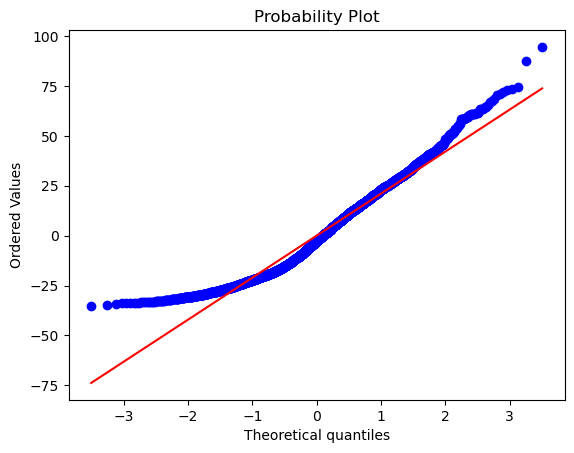

Shapiro-wilk test statistic = 0.957
Shapiro-wilk test p-value = 0.000


In [34]:
_=qda.Assumptions(df['residuals_cubic']).normality()

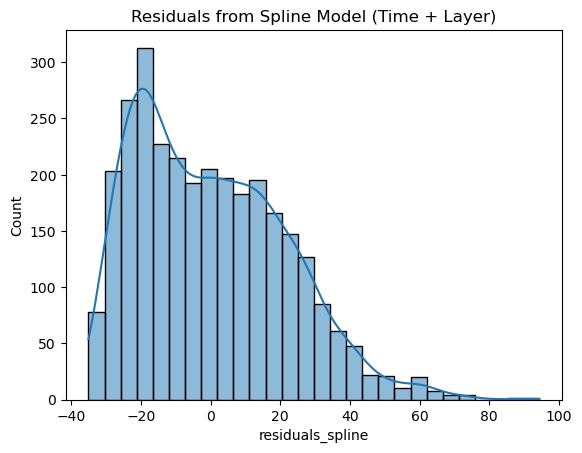

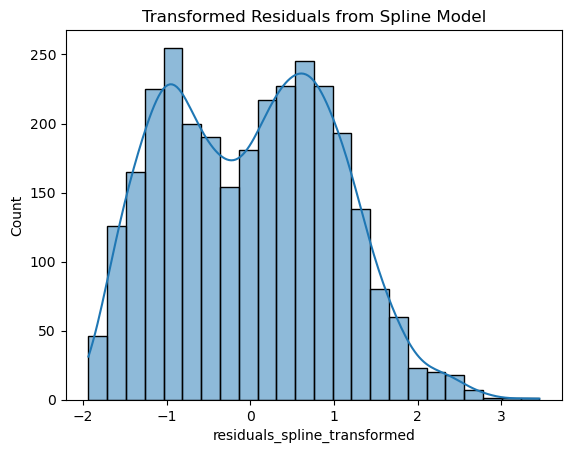

Shapiro-Wilk Test for spline model: p-value = 5.428371760137285e-22


In [42]:
from patsy import dmatrix

# Step 1: Create splines for time (with 5 basis functions)
spline = dmatrix("bs(t, df=5, include_intercept=True)", data=df, return_type='dataframe')

# Step 2: Fit the regression model using splines for time
X_spline = pd.concat([spline, df['layer_id']], axis=1)  # Add layer_id as a covariate
X_spline = sm.add_constant(X_spline)  # Add constant term for intercept
model_spline = sm.OLS(df['T2'], X_spline).fit()

# Step 3: Get residuals from the spline model
df['residuals_spline'] = model_spline.resid

# Step 4: Check residuals from spline model
sns.histplot(df['residuals_spline'], kde=True)
plt.title('Residuals from Spline Model (Time + Layer)')
plt.show()

# Step 5: Transform residuals (Yeo-Johnson for normality)
df['residuals_spline_transformed'] = pt.fit_transform(df[['residuals_spline']])

# Step 6: Check transformed residuals
sns.histplot(df['residuals_spline_transformed'], kde=True)
plt.title('Transformed Residuals from Spline Model')
plt.show()

# Step 7: Shapiro-Wilk Test for normality
stat, p = stats.shapiro(df['residuals_spline_transformed'])
print("Shapiro-Wilk Test for spline model: p-value =", p)


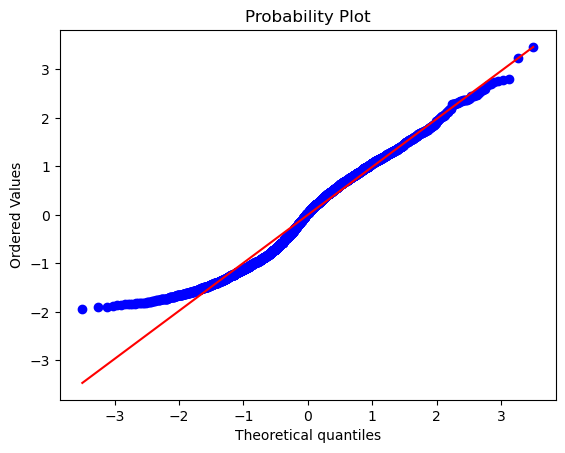

Shapiro-wilk test statistic = 0.976
Shapiro-wilk test p-value = 0.000


In [37]:
_=qda.Assumptions(df['residuals_spline_transformed']).normality()

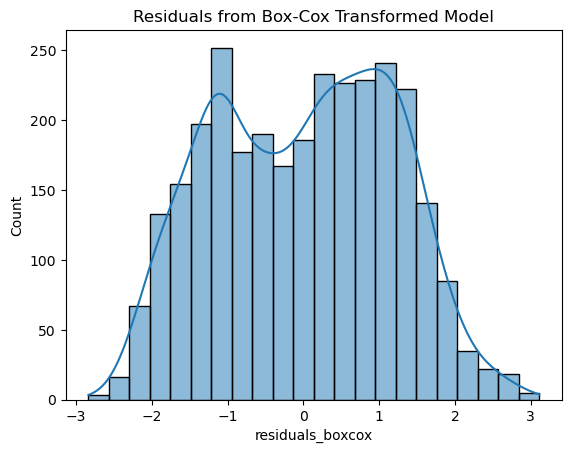

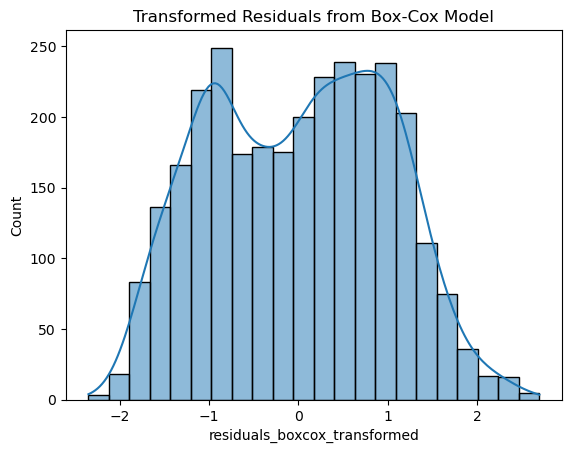

Shapiro-Wilk Test for Box-Cox model: p-value = 3.519437017737191e-21


In [63]:
from scipy import stats

# Step 1: Apply a Box-Cox transformation to T2 (only works with positive values)
df['T2_transformed'], lambda_ = stats.boxcox(df['T2'] + 1)  # Add 1 if there are zeros in T2

# Step 2: Fit the same model to transformed T2
X_boxcox = sm.add_constant(df[['t', 't_squared', 'layer_id']])
model_boxcox = sm.OLS(df['T2_transformed'], X_boxcox).fit()
df['residuals_boxcox'] = model_boxcox.resid

# Step 3: Check residuals from Box-Cox transformed model
sns.histplot(df['residuals_boxcox'], kde=True)
plt.title('Residuals from Box-Cox Transformed Model')
plt.show()

# Step 4: Transform residuals (Yeo-Johnson for normality)
df['residuals_boxcox_transformed'] = pt.fit_transform(df[['residuals_boxcox']])

# Step 5: Check transformed residuals
sns.histplot(df['residuals_boxcox_transformed'], kde=True)
plt.title('Transformed Residuals from Box-Cox Model')
plt.show()

# Step 6: Shapiro-Wilk Test for normality
stat, p = stats.shapiro(df['residuals_boxcox_transformed'])
print("Shapiro-Wilk Test for Box-Cox model: p-value =", p)


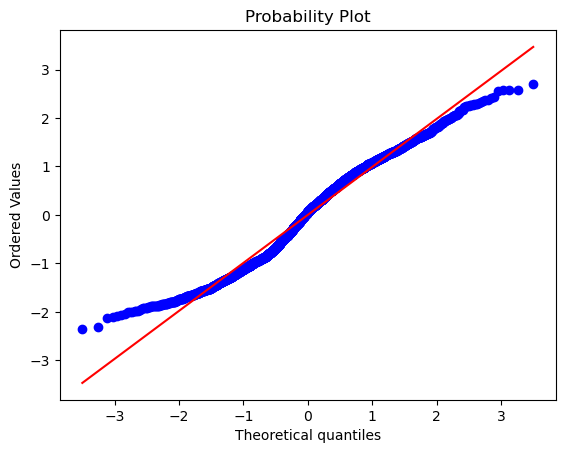

Shapiro-wilk test statistic = 0.978
Shapiro-wilk test p-value = 0.000


In [64]:
_= qda.Assumptions(df['residuals_boxcox_transformed']).normality()

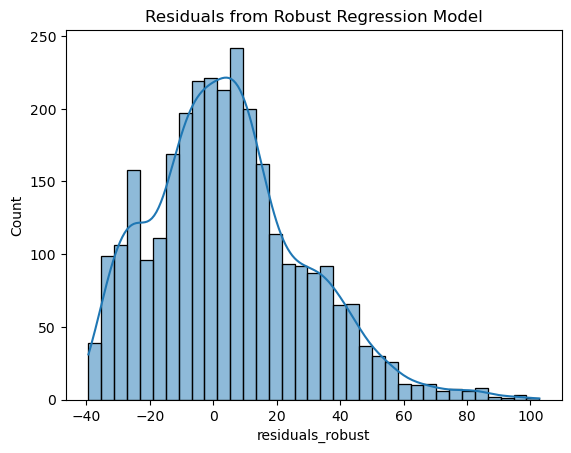

Shapiro-Wilk Test for Robust Regression residuals: p-value = 5.262578504517668e-23


In [65]:
from sklearn.linear_model import HuberRegressor

# Step 1: Prepare the features (add constant)
X_robust = df[['t', 't_squared', 'layer_id']]
X_robust = sm.add_constant(X_robust)  # Add intercept column

# Step 2: Fit a robust regression model
robust_model = HuberRegressor()
robust_model.fit(X_robust, df['T2'])

# Step 3: Get residuals from the robust model
df['residuals_robust'] = df['T2'] - robust_model.predict(X_robust)

# Step 4: Check residuals from robust regression model
sns.histplot(df['residuals_robust'], kde=True)
plt.title('Residuals from Robust Regression Model')
plt.show()

# Step 5: Shapiro-Wilk Test on residuals
stat, p = stats.shapiro(df['residuals_robust'])
print("Shapiro-Wilk Test for Robust Regression residuals: p-value =", p)


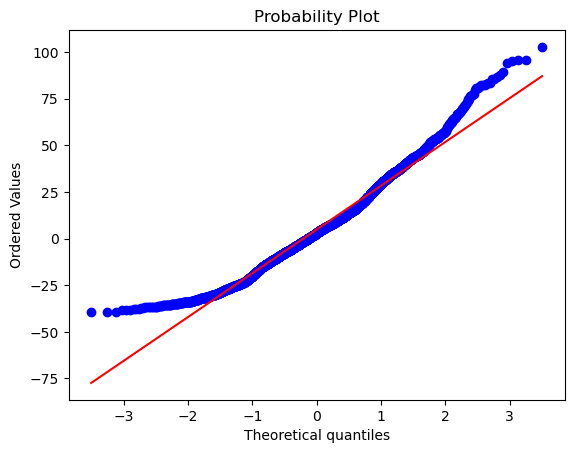

Shapiro-wilk test statistic = 0.974
Shapiro-wilk test p-value = 0.000


In [66]:
_= qda.Assumptions(df['residuals_robust']).normality()

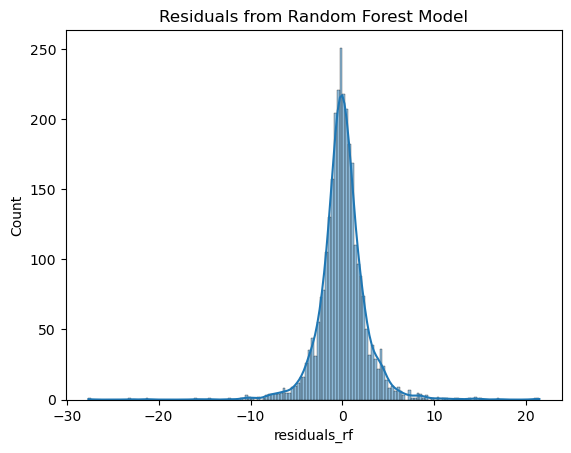

Shapiro-Wilk Test for Random Forest residuals: p-value = 3.699427945817517e-43


In [67]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Prepare features and target
X_rf = df[['t', 't_squared', 'layer_id']]
y_rf = df['T2']

# Step 2: Fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_rf, y_rf)

# Step 3: Make predictions and compute residuals
df['residuals_rf'] = df['T2'] - rf_model.predict(X_rf)

# Step 4: Check residuals from Random Forest model
sns.histplot(df['residuals_rf'], kde=True)
plt.title('Residuals from Random Forest Model')
plt.show()

# Step 5: Shapiro-Wilk Test on residuals
stat, p = stats.shapiro(df['residuals_rf'])
print("Shapiro-Wilk Test for Random Forest residuals: p-value =", p)


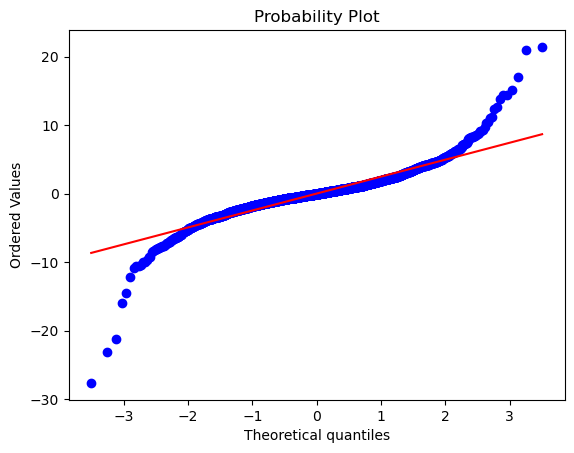

Shapiro-wilk test statistic = 0.881
Shapiro-wilk test p-value = 0.000


In [68]:
_= qda.Assumptions(df['residuals_rf']).normality()

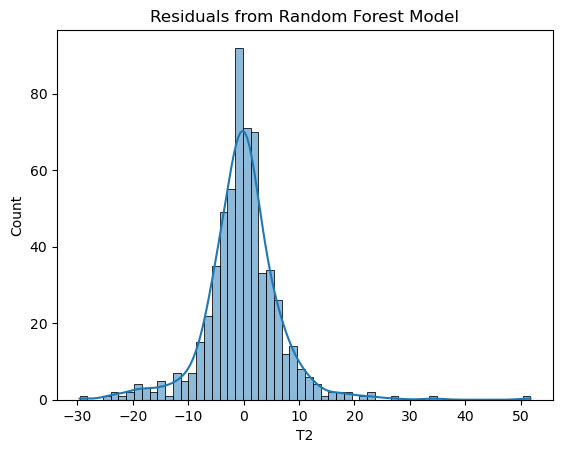

Shapiro-Wilk Test for Random Forest residuals: p-value = 6.459249710200752e-19


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Step 1: Prepare the features and target variable
X_rf = df[['t', 't_squared', 'layer_id']]
y_rf = df['T2']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Step 3: Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions and calculate residuals
y_pred_rf = rf_model.predict(X_test)
residuals_rf = y_test - y_pred_rf

# Step 5: Check residuals (distribution)
sns.histplot(residuals_rf, kde=True)
plt.title('Residuals from Random Forest Model')
plt.show()

# Step 6: Shapiro-Wilk Test on residuals
stat, p = stats.shapiro(residuals_rf)
print("Shapiro-Wilk Test for Random Forest residuals: p-value =", p)


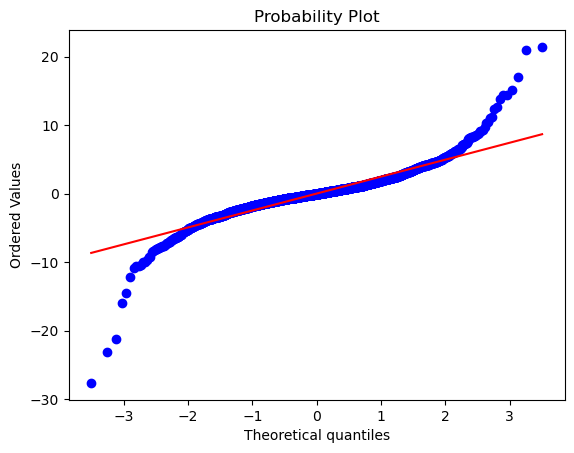

Shapiro-wilk test statistic = 0.881
Shapiro-wilk test p-value = 0.000


In [70]:
_= qda.Assumptions(df['residuals_rf']).normality()

Note: you may need to restart the kernel to use updated packages.


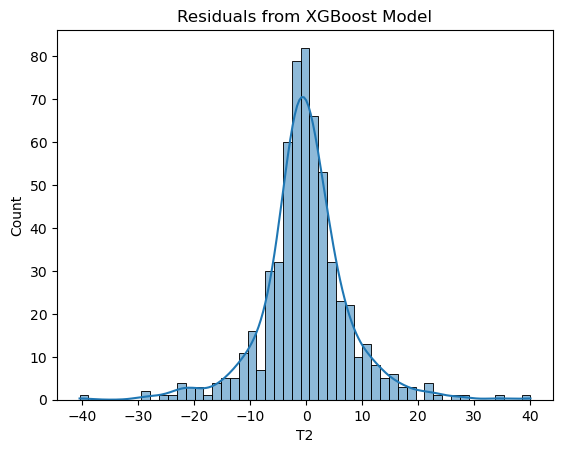

Shapiro-Wilk Test for XGBoost residuals: p-value = 7.180388820520942e-16


In [71]:
%pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Step 1: Prepare the features and target variable
X_xgb = df[['t', 't_squared','layer_id']]
y_xgb = df['T2']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

# Step 3: Fit the Gradient Boosting (XGBoost) model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions and calculate residuals
y_pred_xgb = xgb_model.predict(X_test)
residuals_xgb = y_test - y_pred_xgb

# Step 5: Check residuals (distribution)
sns.histplot(residuals_xgb, kde=True)
plt.title('Residuals from XGBoost Model')
plt.show()

# Step 6: Shapiro-Wilk Test on residuals
stat, p = stats.shapiro(residuals_xgb)
print("Shapiro-Wilk Test for XGBoost residuals: p-value =", p)


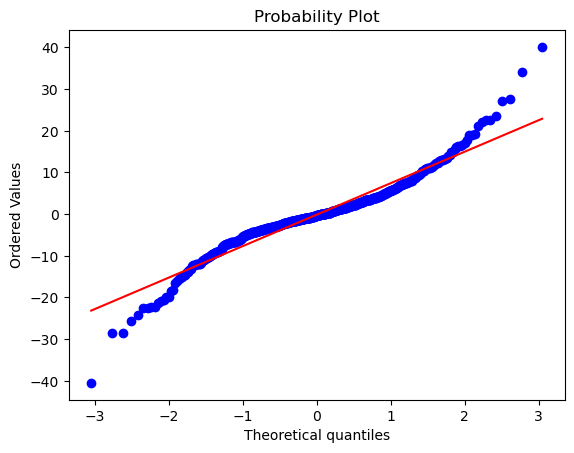

Shapiro-wilk test statistic = 0.932
Shapiro-wilk test p-value = 0.000


In [72]:
_= qda.Assumptions(residuals_xgb).normality()

Note: you may need to restart the kernel to use updated packages.


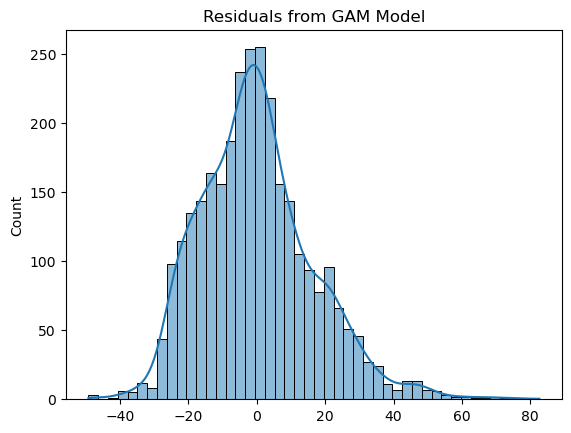

Shapiro-Wilk Test for GAM residuals: p-value = 9.32177519410514e-22


In [74]:
%pip install pygam
from pygam import LinearGAM, s

# Step 1: Prepare features and target variable
X_gam = df[['t', 't_squared','layer_id']].values
y_gam = df['T2'].values

# Step 2: Fit a Generalized Additive Model (GAM)
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_gam, y_gam)  # s(0), s(1), s(2), s(3) are splines for each feature

# Step 3: Check the residuals
y_pred_gam = gam.predict(X_gam)
residuals_gam = y_gam - y_pred_gam

# Step 4: Check residuals (distribution)
sns.histplot(residuals_gam, kde=True)
plt.title('Residuals from GAM Model')
plt.show()

# Step 5: Shapiro-Wilk Test on residuals
stat, p = stats.shapiro(residuals_gam)
print("Shapiro-Wilk Test for GAM residuals: p-value =", p)


/opt/anaconda3/envs/qda/lib/python3.9/site-packages/qdatoolkit/models.py:731: UserWarning: A numpy array was passed to the Assumptions class and converted to Pandas Series.
Note that all other methods in qda-toolkit only accept Pandas Series or Pandas Dataframe.
  warnings.warn(


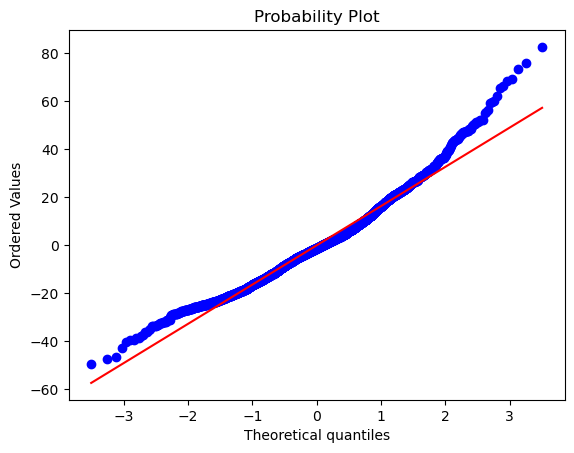

Shapiro-wilk test statistic = 0.977
Shapiro-wilk test p-value = 0.000


In [75]:
_= qda.Assumptions(residuals_gam).normality()

In [76]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(df['T2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value is > 0.05, the series is non-stationary and needs differencing


ADF Statistic: -5.040811426518979
p-value: 1.8415454702018607e-05


In [83]:
# fit model ARIMA with constant term
model = qda.ARIMA(df['T2'], order=(0,1,1), add_constant=False)

qda.ARIMAsummary(model)


---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef  T-Value  P-Value
ma.L1 -0.3824   0.0087 -44.1915      0.0

RESIDUAL SUM OF SQUARES
-------------------------
    DF          SS      MS
2998.0 186106.3616 62.0768

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square     P-Value
  12    457.4511  2.4700e-90
  24    634.9562 1.1323e-118
  36    713.4052 8.8167e-127
  48    743.8858 1.5971e-125


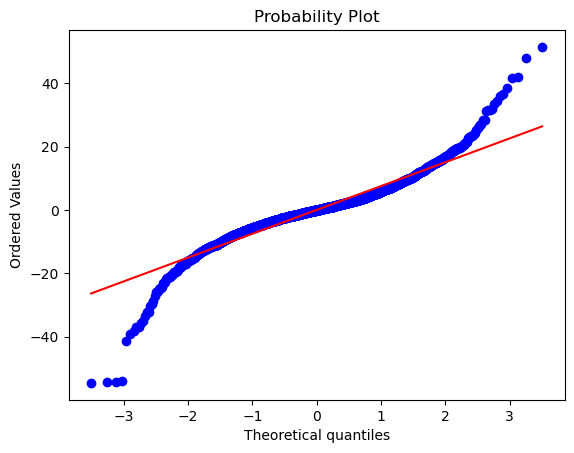

Shapiro-wilk test statistic = 0.914
Shapiro-wilk test p-value = 0.000
Runs test statistic = 2.000
Runs test p-value = 0.045



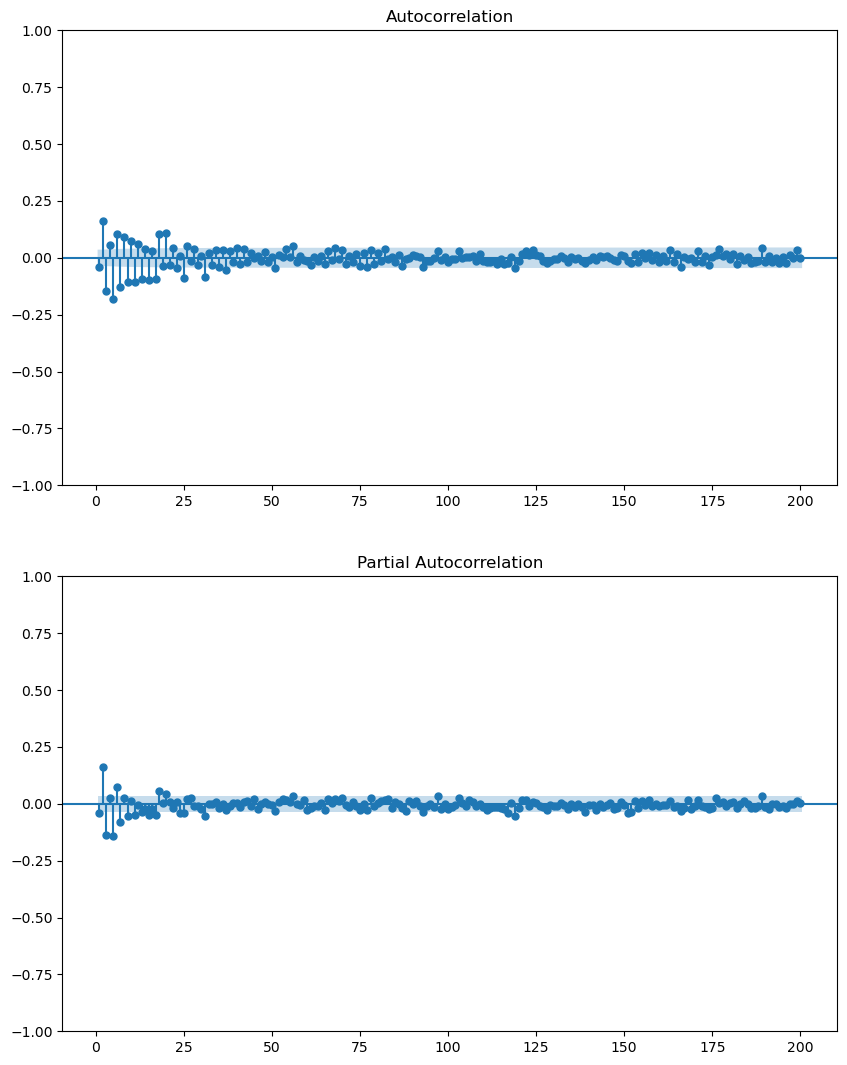

In [86]:
residuals=model.resid
_= qda.Assumptions(residuals).normality()   
_= qda.Assumptions(residuals).independence()

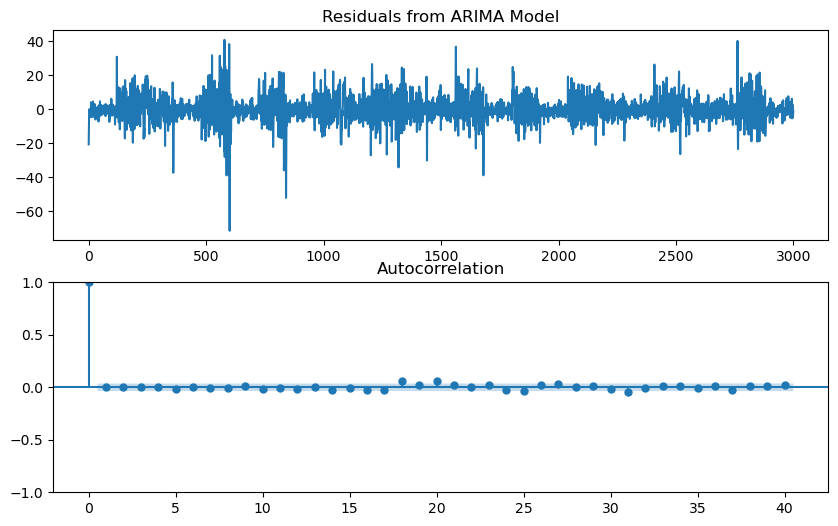

Shapiro-Wilk Test p-value: 1.0303139108335232e-34


In [80]:
# Residuals
residuals = df['T2'] - model.predict_in_sample()

# Plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')

# Plot the ACF and PACF of residuals to check if they resemble white noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot(212)
plot_acf(residuals.dropna(), lags=40, ax=plt.gca())
plt.show()

# Shapiro-Wilk Test on residuals
from scipy import stats
stat, p = stats.shapiro(residuals.dropna())
print(f"Shapiro-Wilk Test p-value: {p}")


In [81]:
# Forecast the next 'n' time steps
forecast = model.predict(n_periods=10)
print(forecast)


3000    23.9529
3001    24.9173
3002    25.4225
3003    26.0019
3004    26.1846
3005    26.6414
3006    26.8253
3007    27.2509
3008    27.4348
3009    27.8318
dtype: float64


/opt/anaconda3/envs/qda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import statsmodels.api as sm
# Step 1: Add time (index) and quadratic time term
df['t'] = df.index  # Time as the index (row number)
df['t_squared'] = df['t'] ** 2  # Quadratic term for time
df['t_cubed'] = df['t'] ** 3  # Cubic term for time

# Step 2: Fit the regression model with t, t^2, t^3 and layer_id
X = sm.add_constant(df[['t', 't_squared','t_cubed', 'layer_id']])  # Add constant term for intercept
y= df['T2']  # Target variable

# Create a StepwiseRegression object using the qda library
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)
# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term    Coef  P-Value
const 39.9867      0.0

MODEL SUMMARY
-------------
      S        R-sq   R-sq(adj)
21.8478 -1.1102e-15 -1.1102e-15
Backward Elimination

No predictor removed.

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
   Term        Coef    P-Value
  const  4.1848e+01 0.0000e+00
t_cubed -2.7590e-10 1.1435e-07

MODEL SUMMARY
-------------
      S   R-sq  R-sq(adj)
21.7492 0.0093      0.009
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection

COEFFICIENTS
------------
   Term        Coef     P-Value
  const  3.5499e+01 1.5373e-212
t_cubed -1.0997e-09  2.0527e-17
      t  7.9395e-03  3.5534e-12

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
21.578 0.0252     0.0245
Backward Elimination

No

In [107]:
# Print the summary of the model
model = model.model_fit
qda.summary(model)

REGRESSION EQUATION
-------------------
T2 =  + 30.624 const + 0.000 t_cubed + 0.026 t -0.000 t_squared

COEFFICIENTS
------------
     Term        Coef    SE Coef  T-Value    P-Value
    const  3.0624e+01 1.5696e+00  19.5106 6.6265e-80
  t_cubed  2.0662e-09 7.6999e-10   2.6835 7.3267e-03
        t  2.6242e-02 4.5333e-03   5.7888 7.8232e-09
t_squared -1.4649e-05 3.5129e-06  -4.1700 3.1329e-05

MODEL SUMMARY
-------------
      S   R-sq  R-sq(adj)
21.5193 0.0308     0.0298

ANALYSIS OF VARIANCE
---------------------
    Source     DF     Adj SS      Adj MS  F-Value    P-Value
Regression    3.0 4.4118e+04  14705.9309  31.7569 3.3388e-20
     const    1.0 1.7628e+05 176277.5237 380.6641 6.6265e-80
   t_cubed    1.0 3.3346e+03   3334.5902   7.2009 7.3267e-03
         t    1.0 1.5518e+04  15517.8466  33.5102 7.8232e-09
 t_squared    1.0 8.0523e+03   8052.2950  17.3886 3.1329e-05
     Error 2996.0 1.3874e+06    463.0789      NaN        NaN
     Total 2999.0 1.4315e+06         NaN      NaN   

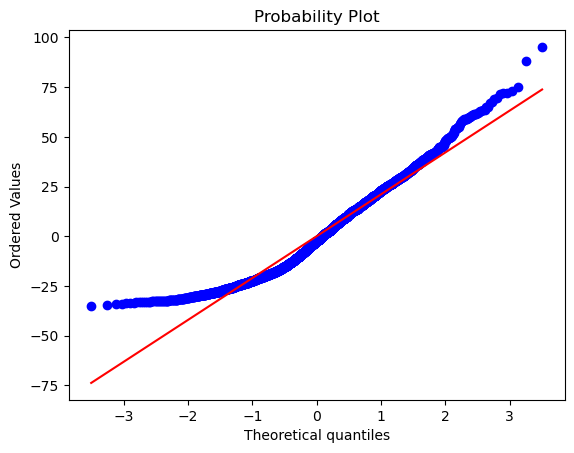

Shapiro-wilk test statistic = 0.959
Shapiro-wilk test p-value = 0.000
Runs test statistic = -45.244
Runs test p-value = 0.000



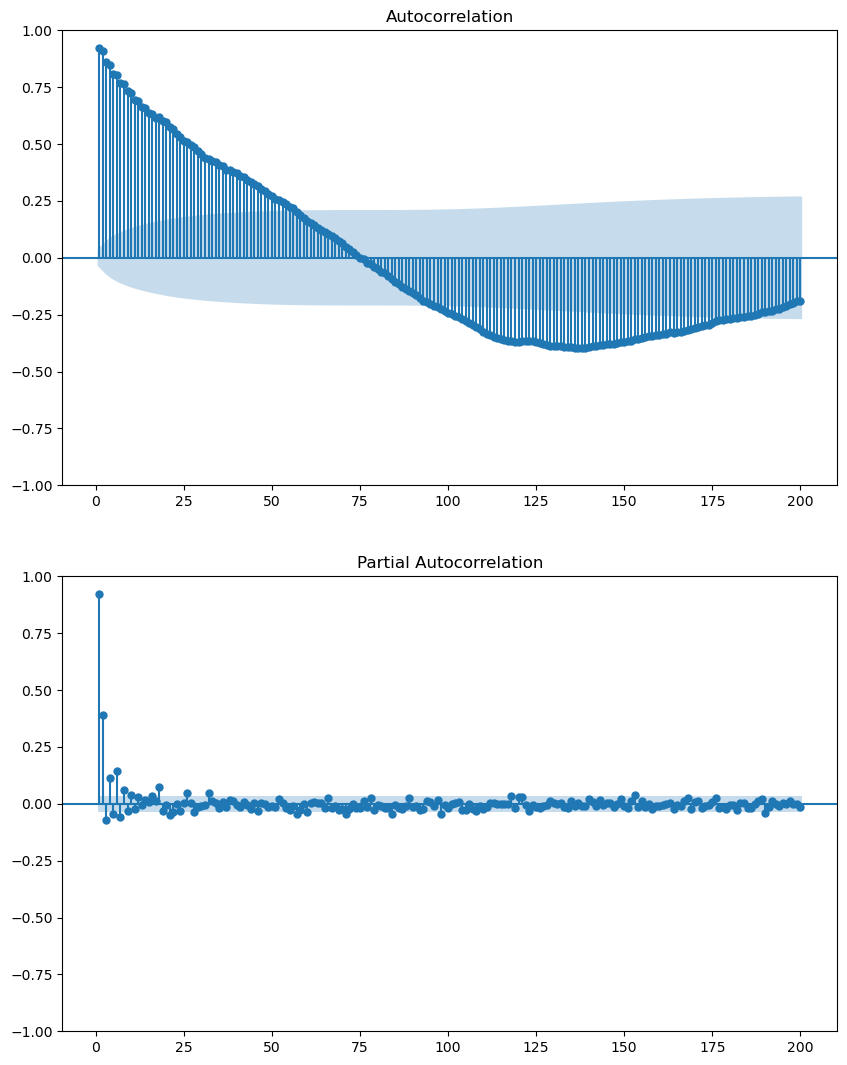

In [108]:
residuals = model.resid
_= qda.Assumptions(residuals).normality()
_= qda.Assumptions(residuals).independence()